# **7-Duel Zones**

In [ ]:

# make sure you have done pip install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import urllib
import json
import yaml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
from mplsoccer import PyPizza, add_image, FontManager
from mplsoccer import Pitch, VerticalPitch
import cmasher as cmr
import matplotlib.patches as mpatches
from matplotlib.patches import RegularPolygon
from PIL import Image
import urllib
import json
import os
import math
from selenium.webdriver.chrome.service import Service
#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
import datetime
from ast import literal_eval
from scipy import stats
from scipy.spatial import ConvexHull
from matplotlib.collections import LineCollection
from matplotlib.patches import Polygon



from matplotlib.colors import LinearSegmentedColormap  
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

red_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#FFBEBE', '#FF0000'], N=10)
el_greco_violet_cmap = LinearSegmentedColormap.from_list("El Greco Violet - 10 colors",
                                                         ['#332a49', '#8e78a0'], N=10)
el_greco_yellow_cmap = LinearSegmentedColormap.from_list("El Greco Yellow - 10 colors",
                                                         ['#7c2e2a', '#f2dd44'], N=10)
flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#e3aca7', '#c03a1d'], N=10)
# same color maps but with 100 colors
pearl_earring_cmap_100 = LinearSegmentedColormap.from_list("Pearl Earring - 100 colors",
                                                           ['#15242e', '#4393c4'], N=100)
el_greco_violet_cmap_100 = LinearSegmentedColormap.from_list("El Greco Violet - 100 colors",
                                                             ['#3b3154', '#8e78a0'], N=100)
el_greco_yellow_cmap_100 = LinearSegmentedColormap.from_list("El Greco Yellow - 100 colors",
                                                             ['#7c2e2a', '#f2dd44'], N=100)
flamingo_cmap_100 = LinearSegmentedColormap.from_list("Flamingo - 100 colors",
                                                      ['#e3aca7', '#c03a1d'], N=100)


codes_logo = { "Liverpool" :8650,  "Manchester City" :  8456,"Arsenal" :9825, "Tottenham" :  8586, "Brighton" :10204, "Leeds United" :8463,
  "Chelsea" :8455, "Brentford" :9937, "Newcastle Utd" :10261,  "Fulham" :9879, "Crystal Palace" :9826, "Manchester Utd" :10260,
       "Everton" :8668, "Southampton":8466, "Aston Villa" :10252, "Nott'ham Forest":10203,
       "Wolves":8602,"West Ham" :8654,"Leicester City" : 8197,  "Bournemouth" :8678,"Luton Town":8346}



In [3]:

pitch = Pitch(
    pitch_type='opta',
    half=False,
    axis=True, 
    label=True, 
    tick=True,
    goal_type='box',
    positional=True
)

# Here we can get the positional dimensions
pos_x = pitch.dim.positional_x
pos_y = pitch.dim.positional_y


In [21]:
file_path = r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Season Data\Whoscored Season Data\Prem 24-25\ENG1-2425.csv'
# file_path = r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Season Data\Whoscored Season Data\Scraper\Prem23-24.csv'
# file_path = r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Data\Prem22-23.csv'
main_data = pd.read_csv(file_path, low_memory=False)
main_data["Match Name"] = main_data["Home"]+main_data["Away"]
event_df = main_data.copy()

In [22]:
event_df.team.unique()

array([nan, 'Arsenal', 'Wolves', 'Everton', 'Brighton', 'Manchester Utd',
       'Fulham', 'Ipswich', 'Liverpool', 'Southampton', 'Newcastle Utd',
       "Nott'ham Forest", 'Bournemouth', 'Aston Villa', 'West Ham',
       'Crystal Palace', 'Brentford', 'Manchester City', 'Chelsea',
       'Tottenham', 'Leicester City'], dtype=object)

In [67]:
team_name= "Liverpool"

event_df = event_df[event_df['Home'].notna()]
event_df = event_df[event_df['Match Name'].str.contains(team_name)]
# event_df = event_df[(event_df['x'] >= 33.5)]
# event_df = event_df[(event_df['x'] <= 66.5)]

event_df["Duels"] = False
goal_id = [199,200]
for index, row in event_df.iterrows():
    if len(set(goal_id).intersection(eval(row["satisfiedEventsTypes"]))) > 0:
        event_df.loc[index, 'Duels'] = True
        
event_df = event_df[event_df['Duels'] == True]
event_df = event_df[event_df['team'] == team_name]
pos_x = pitch.dim.positional_x
pos_y = pitch.dim.positional_y



data_passes = event_df.assign(bins_x = lambda x: pd.cut(x.x, bins=pos_x))
data_passes = data_passes.assign(bins_y = lambda x: pd.cut(x.y, bins=pos_y))

# Define a dictionary to map (bins_x, bins_y) combinations to zone labels
zone_labels = {
    (pd.Interval(0.0, 17.0, closed='right'), pd.Interval(0.0,  21.1, closed='right')): 1,
    (pd.Interval(0.0, 17.0, closed='right'), pd.Interval(21.1, 36.8, closed='right')): 7,
    (pd.Interval(0.0, 17.0, closed='right'), pd.Interval(36.8, 63.2, closed='right')): 13,
    (pd.Interval(0.0, 17.0, closed='right'), pd.Interval(63.2, 78.9, closed='right')): 19,
    (pd.Interval(0.0, 17.0, closed='right'), pd.Interval(78.9, 100.0, closed='right')): 25,
    (pd.Interval(17.0, 33.5, closed='right'), pd.Interval(0.0,  21.1, closed='right')): 2,
    (pd.Interval(17.0, 33.5, closed='right'), pd.Interval(21.1, 36.8, closed='right')): 8,
    (pd.Interval(17.0, 33.5, closed='right'), pd.Interval(36.8, 63.2, closed='right')): 14,
    (pd.Interval(17.0, 33.5, closed='right'), pd.Interval(63.2, 78.9, closed='right')): 20,
    (pd.Interval(17.0, 33.5, closed='right'), pd.Interval(78.9, 100.0,closed='right')): 26,
    (pd.Interval(33.5, 50.0, closed='right'), pd.Interval(0.0,  21.1, closed='right')): 3,
    (pd.Interval(33.5, 50.0, closed='right'), pd.Interval(21.1, 36.8, closed='right')): 9,
    (pd.Interval(33.5, 50.0, closed='right'), pd.Interval(36.8, 63.2, closed='right')): 15,
    (pd.Interval(33.5, 50.0, closed='right'), pd.Interval(63.2, 78.9,  closed='right')): 21,
    (pd.Interval(33.5, 50.0, closed='right'), pd.Interval(78.9, 100.0, closed='right')): 27,
     # Bins for x: (50.0, 66.5]
    (pd.Interval(50.0, 66.5, closed='right'), pd.Interval(0.0, 21.1, closed='right')): 4,
    (pd.Interval(50.0, 66.5, closed='right'), pd.Interval(21.1, 36.8, closed='right')): 10,
    (pd.Interval(50.0, 66.5, closed='right'), pd.Interval(36.8, 63.2, closed='right')): 16,
    (pd.Interval(50.0, 66.5, closed='right'), pd.Interval(63.2, 78.9, closed='right')): 22,
    (pd.Interval(50.0, 66.5, closed='right'), pd.Interval(78.9, 100.0, closed='right')): 28,
    # Bins for x: (66.5, 83.0]
    (pd.Interval(66.5, 83.0, closed='right'), pd.Interval(0.0, 21.1, closed='right')): 5,
    (pd.Interval(66.5, 83.0, closed='right'), pd.Interval(21.1, 36.8, closed='right')): 11,
    (pd.Interval(66.5, 83.0, closed='right'), pd.Interval(36.8, 63.2, closed='right')): 17,
    (pd.Interval(66.5, 83.0, closed='right'), pd.Interval(63.2, 78.9, closed='right')): 23,
    (pd.Interval(66.5, 83.0, closed='right'), pd.Interval(78.9, 100.0, closed='right')): 29,
    # Bins for x: (83.0, 100.0]
    (pd.Interval(83.0, 100.0, closed='right'), pd.Interval(0.0, 21.1, closed='right')): 6,
    (pd.Interval(83.0, 100.0, closed='right'), pd.Interval(21.1, 36.8, closed='right')): 12,
    (pd.Interval(83.0, 100.0, closed='right'), pd.Interval(36.8, 63.2, closed='right')): 18,
    (pd.Interval(83.0, 100.0, closed='right'), pd.Interval(63.2, 78.9, closed='right')): 24,
    (pd.Interval(83.0, 100.0, closed='right'), pd.Interval(78.9, 100.0, closed='right')): 30}

# Create a new column 'zone' that maps the (bins_x, bins_y) combinations to zone labels
data_passes = data_passes.assign(
    zone=lambda x: x.apply(lambda row: zone_labels.get((row['bins_x'], row['bins_y']), 'Unknown Zone'), axis=1)
)


success_df = data_passes[data_passes['outcomeType'] == 'Successful'].groupby('zone').size().reset_index(name='success_count')

# Create the Failure DataFrame
failure_df = data_passes[data_passes['outcomeType'] == 'Unsuccessful'].groupby('zone').size().reset_index(name='failure_count')

combined_df = pd.merge(success_df, failure_df, on='zone', how='outer')

# Fill NaN values with 0
combined_df = combined_df.fillna(0)
combined_df['success_percentage'] = (combined_df['success_count'] / (combined_df['success_count'] + combined_df['failure_count'])) * 100
combined_df['team'] = team_name



In [68]:
def plot_zone_dominance(ax):
    pitch = Pitch(
        pitch_type='opta',
        goal_type='box',
        linewidth=0.7,
        line_color='white',
        pad_top=10,
        corner_arcs=True
    )
    pitch.draw(ax = ax)
    ax.patch.set_facecolor('black')
    # Here we can get the positional dimensions
    pos_x = pitch.dim.positional_x
    pos_y = pitch.dim.positional_y

    # We test the dimensions with the labels we got from the Analyst
    counter = 1
    combined_df['zone'] = combined_df['zone'].astype(int)
    for index_y, y in enumerate(pos_y):
        for index_x, x in enumerate(pos_x):
            try:
                label_y = (pos_y[index_y] + pos_y[index_y + 1])/2
                label_x = (pos_x[index_x] + pos_x[index_x + 1])/2
                lower_y = pos_y[index_y]
                lower_x = pos_x[index_x]
                upper_y = pos_y[index_y + 1]
                upper_x = pos_x[index_x + 1]
            except:
                continue
            if counter in list(combined_df.zone):
                data_point = combined_df[combined_df['zone'] == counter]['success_percentage'].iloc[0]
                if data_point > 50:
                    color = '#29A100'
                    alphaa = data_point/100
                else:
                    color = 'red'
                    alphaa=  1-(data_point/100)
                ax.fill_between(
                    x=[lower_x, upper_x],
                    y1=lower_y,
                    y2=upper_y,
                    color=color,
                    zorder=0,
                    alpha=alphaa,
                    ec='None'
                )
                counter += 1
            else :
                counter += 1
    ax.annotate(
        xy=(pos_x[0]*1.15, pos_y[-1]*1.1),
        text=f"{combined_df['team'].iloc[0].upper()} - Duel Win Zones",
        size=10,
        color='white',
        ha='left',
        va='center',family='STXihei',
        weight='bold',
    )
    ax.annotate(
    xy=(pos_x[0]*1.15, pos_y[-1]*1.1-6),
    text=f"Green zone : >50% win , Red <50%. Lighter shading means more wins",
    size=4,
    color='white',
    ha='left',
    va='center',family='STXihei',
    weight='bold',)


    for x in pos_x[1:-1]:
        ax.plot([x,x], [pos_y[0], pos_y[-1]], color='white', ls='dashed', zorder=0, lw=0.3)
    for y in pos_y[1:-1]:
        ax.plot([pos_x[0], pos_x[-1]], [y,y], color='white', ls='dashed', zorder=0, lw=0.3)
    
    return ax

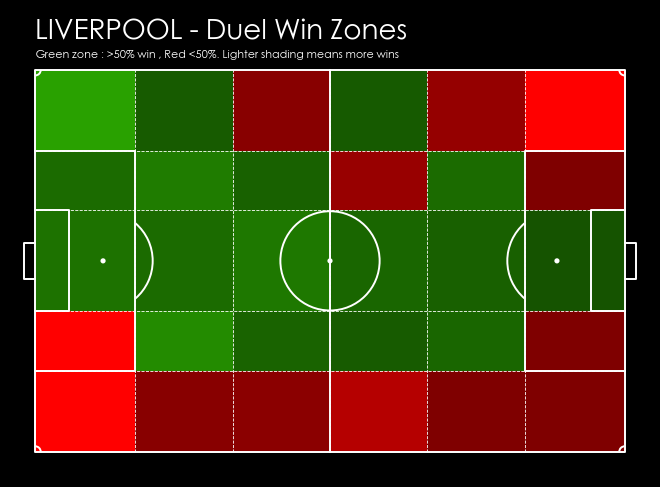

In [69]:
fig = plt.figure(figsize = (4,4), dpi = 200)
ax = plt.subplot(111)

fig.set_facecolor('black')
ax.patch.set_facecolor('black')

plot_zone_dominance(ax)
plt.savefig("Zone_control2.jpg",dpi =500, bbox_inches='tight')